# Necessary Imports

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

In [2]:
from CustomKMeans import CustomKMeans
from evaluation import calculate_silhouette_score
from hyperparameters import kmeans_hyp, dbscan_hyp, datasets
from helper_functions import plot_cluster_3d, create_kdeplot, create_barplot

# K-Means Clustering Algorithm Experiments

In [3]:
score_dict = {"init_method": [],
              "clusters": [],
              "score": [] }

In [4]:
for dataset in datasets:
    print(dataset)

Scaled_Dataset.csv
Scaled_PCA_n3.csv
Scaled_PCA_Variance_85.csv
Scaled_PCA_Variance_95.csv
Scaled_PCA_Variance_99.csv


We have 5 datasets prepared for our modelling experiments. We will fit our KMeans model on each of them, evaluate the models using the silhouette score and choose the number of clusters based on that for the final KMeans model.

Optimial point reached after 10 iterations
cluster labels are:  [0 2 0 ... 0 0 2]
Optimial point reached after 29 iterations
cluster labels are:  [0 1 0 ... 0 2 1]
Optimial point reached after 20 iterations
cluster labels are:  [3 2 3 ... 3 1 2]
Optimial point reached after 14 iterations
cluster labels are:  [1 3 1 ... 1 0 3]
Optimial point reached after 14 iterations
cluster labels are:  [2 3 1 ... 1 4 3]
Optimial point reached after 34 iterations
cluster labels are:  [3 2 1 ... 1 0 2]
Optimial point reached after 27 iterations
cluster labels are:  [4 1 4 ... 4 2 3]
Optimial point reached after 21 iterations
cluster labels are:  [4 1 3 ... 3 5 1]
Optimial point reached after 76 iterations
cluster labels are:  [3 0 3 ... 3 6 0]
Optimial point reached after 62 iterations
cluster labels are:  [1 3 1 ... 1 0 3]
Optimial point reached after 31 iterations
cluster labels are:  [3 0 6 ... 6 5 2]
Optimial point reached after 22 iterations
cluster labels are:  [5 3 5 ... 5 4 3]
Optimial point r

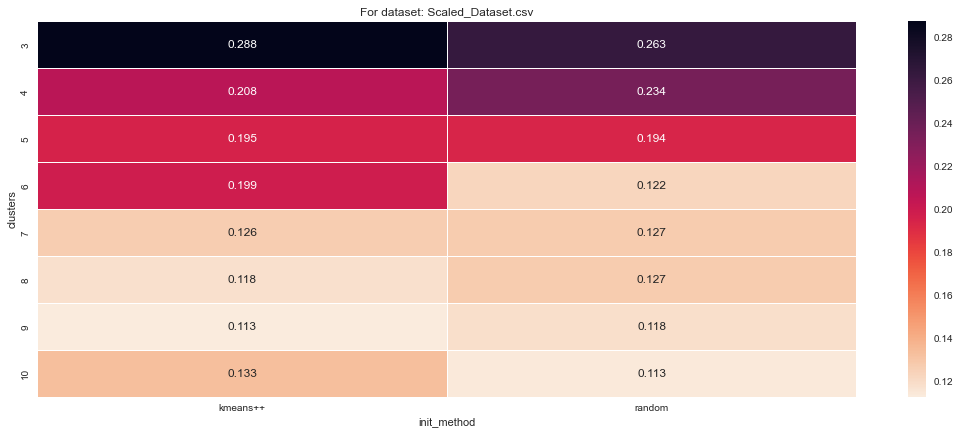

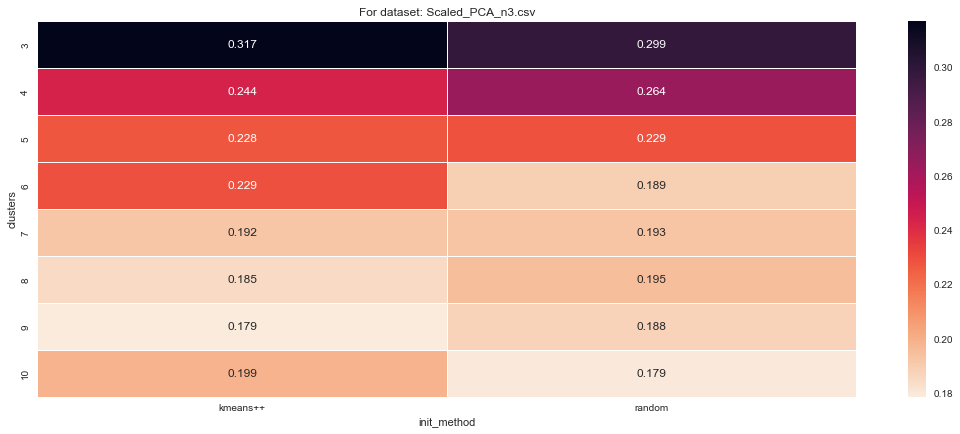

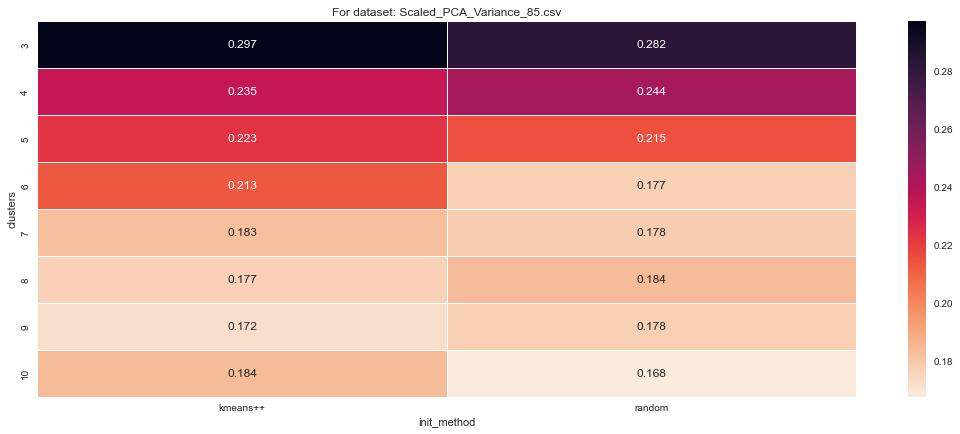

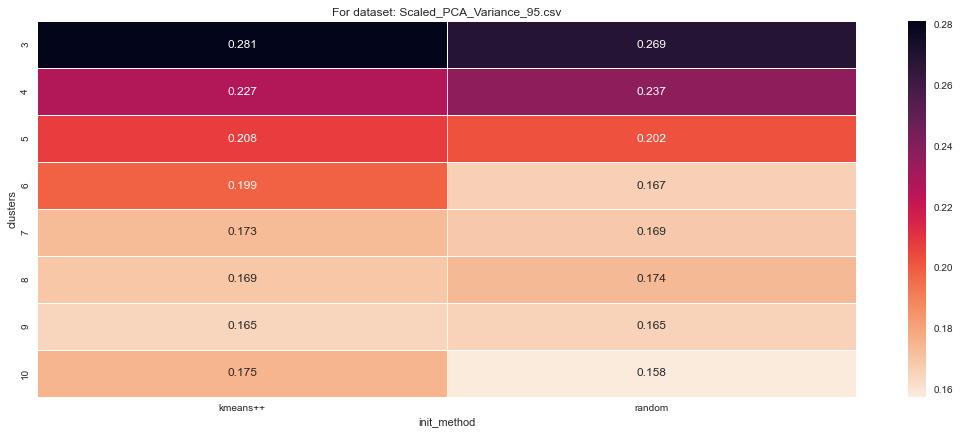

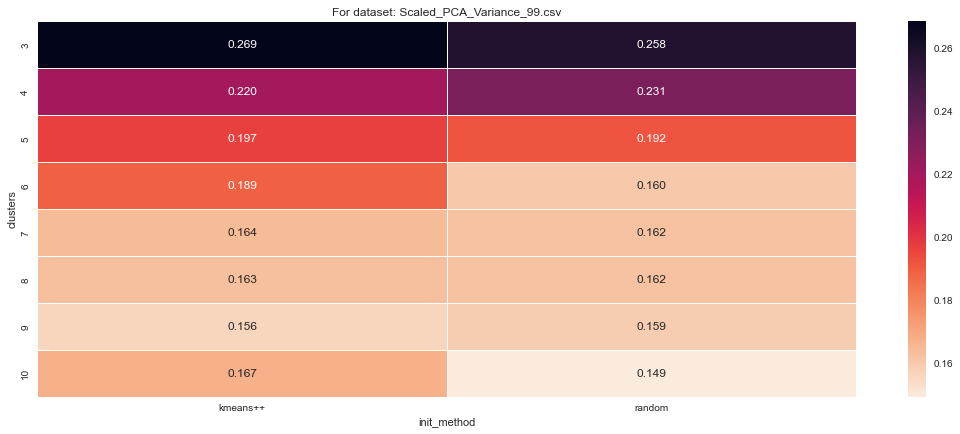

In [6]:
for dataset in datasets:
    data_df = pd.read_csv(dataset)
    data_np = data_df.to_numpy()

    for n_clusters in kmeans_hyp["clusters"]:
        for init in kmeans_hyp[ "initialization_methods"]:
        
            kmeans = CustomKMeans(n_centers=n_clusters, init=init, max_itr=1000)
            kmeans.fit(data_np)
            kmeans.converge()
            cluster_labels = kmeans.data_cluster
            print("cluster labels are: ", cluster_labels)
            
            silhouette_avg = calculate_silhouette_score(data_np, cluster_labels)
            
            score_dict["init_method"].append(init)
            score_dict["clusters"].append(n_clusters)
            score_dict["score"].append(silhouette_avg)

    result = pd.DataFrame(score_dict, columns=["init_method","clusters","score"])
    pivot_km = pd.pivot_table(result, index="clusters", columns="init_method", values="score")

    ## Plot table
    plt.figure(figsize=(15,6))
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
    plt.tight_layout()
    plt.title('For dataset: ' + dataset)


plt.show()

We can also use Elbow method to find the number of clusters

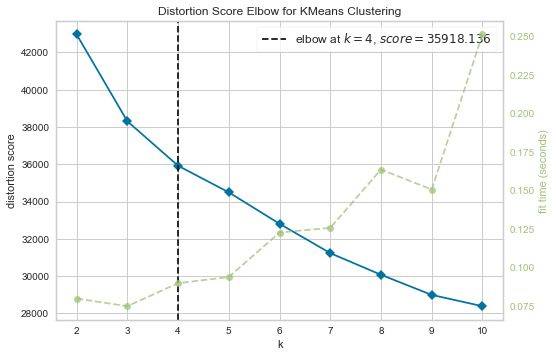

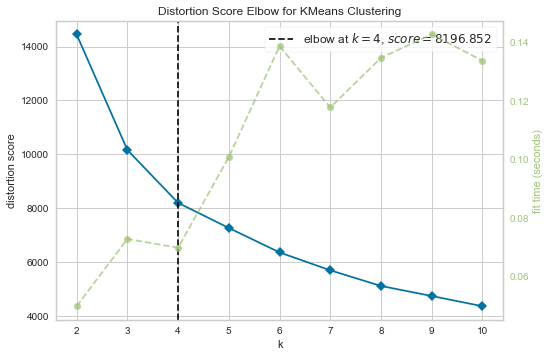

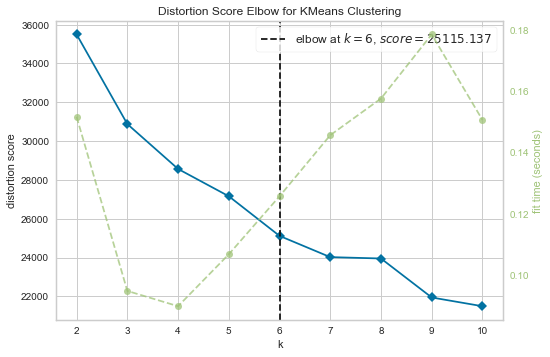

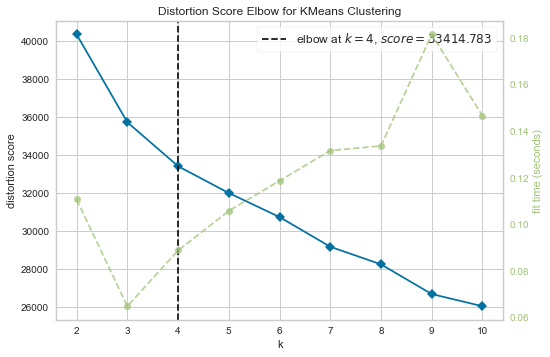

c:\Users\Not Nabu\.conda\envs\cpa_project\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Users\Not Nabu\.conda\envs\cpa_project\lib\site-packages\yellowbrick\cluster\elbow.py:361: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


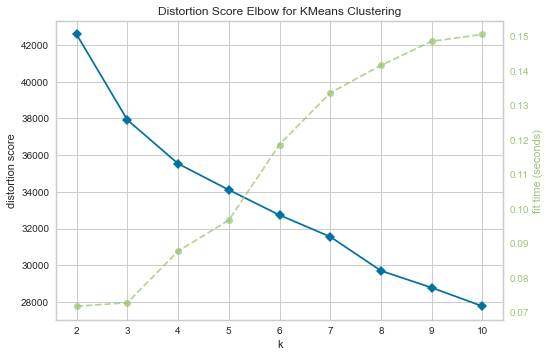

In [7]:
from sklearn.cluster import KMeans

for dataset in datasets:
    data_df = pd.read_csv(dataset)
    data_np = data_df.to_numpy()

    plt_elb = KElbowVisualizer(KMeans(init="k-means++", random_state=2), k=10)
    plt_elb.fit(data_np)
    plt_elb.show();

From the above plots of the silhouette score, we can see that on the dataset `Scaled_PCA_n3.csv` our model has the highest and most stable score. So we will choose that dataset to train our model with the optimal number of clusters and visualize the clusters later.

In [8]:
df_pca_3 = pd.read_csv("Scaled_PCA_n3.csv")
df_pca_3.head()

,PC1,PC2,PC3
0,5.082850,-0.240890,2.681998
1,-2.946684,0.002002,-1.349815
2,2.468732,-0.718572,-0.807411
3,-2.738381,-1.532056,-0.749014
4,-0.748929,0.216956,-0.563133


In [9]:
kmeans = CustomKMeans(n_centers=3, init="kmeans++", max_itr=1000)
kmeans.fit(df_pca_3.to_numpy())
kmeans.converge()
cluster_labels = kmeans.data_cluster

Optimial point reached after 6 iterations


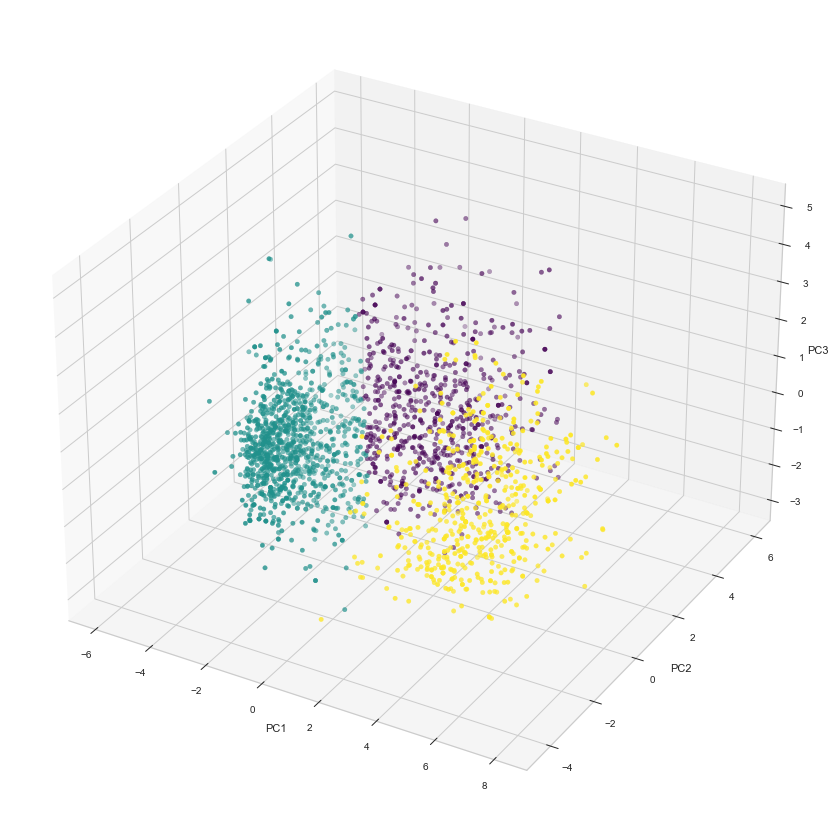

In [10]:
plot_cluster_3d(df_pca_3["PC1"], df_pca_3["PC2"], df_pca_3["PC3"], cluster_labels)

In [11]:
original_data = pd.read_csv("scaled_dataset.csv")
original_data["clusters"] = cluster_labels
original_data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Response,Customer_For,Living_With,Age,Spent,Children,Family_Size,Is_Parent,TotalAcceptedCmp,clusters
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.375425,1.973583,-1.349603,1.018352,1.676245,-1.264598,-1.758359,-1.581139,-0.43916,2
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.420977,-1.665144,-1.349603,1.274785,-0.963297,1.404572,0.449070,0.632456,-0.43916,1
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.420977,-0.172664,0.740959,0.334530,0.280110,-1.264598,-0.654644,-1.581139,-0.43916,2
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.420977,-1.923210,0.740959,-1.289547,-0.920135,0.069987,0.449070,0.632456,-0.43916,1
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,-0.420977,-0.822130,0.740959,-1.033114,-0.307562,0.069987,0.449070,0.632456,-0.43916,1


# DBSCAN Clustering Alogrithm Experiments

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
score_dict = {"eps": [],
              "min_samples": [],
              "score": [] }

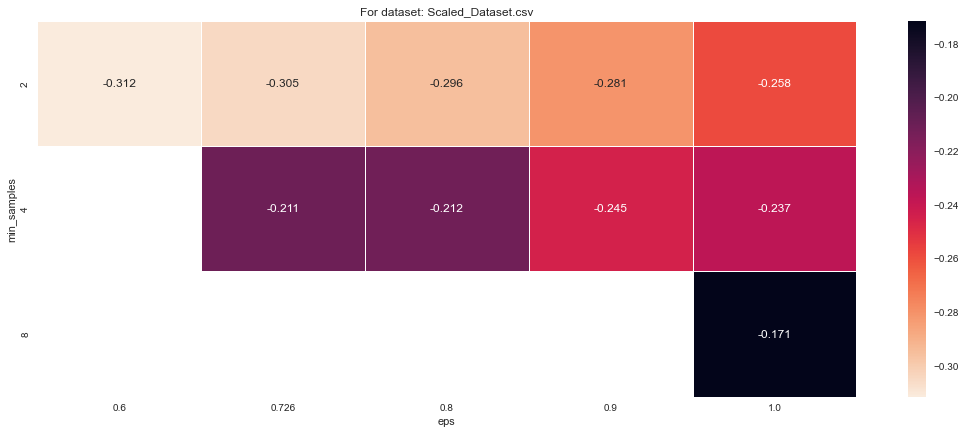

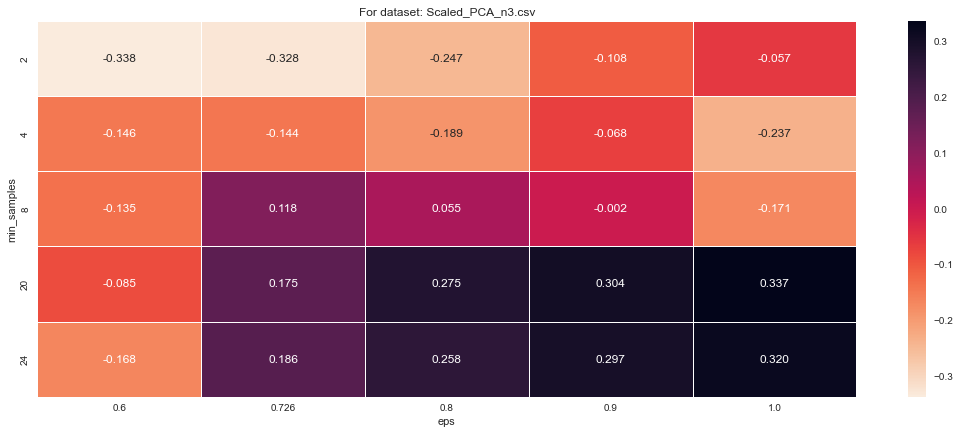

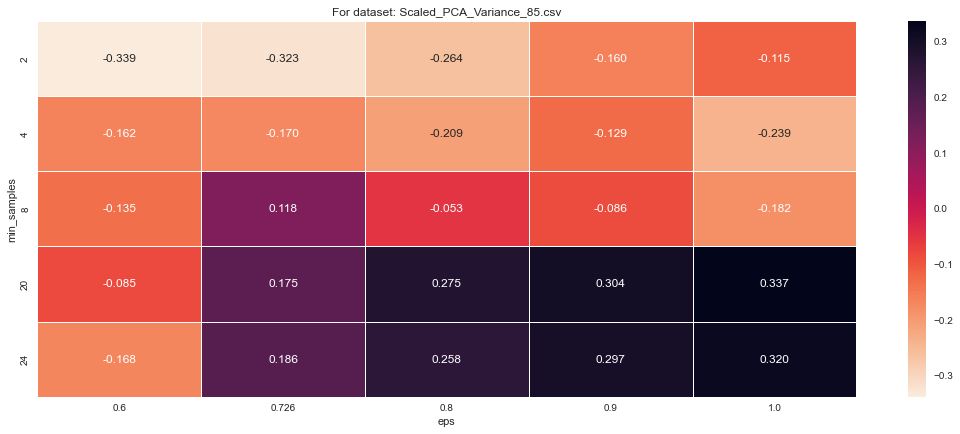

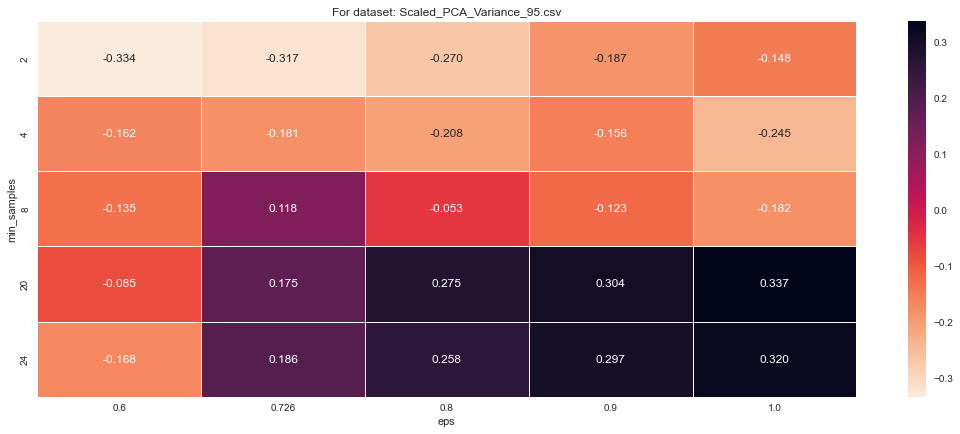

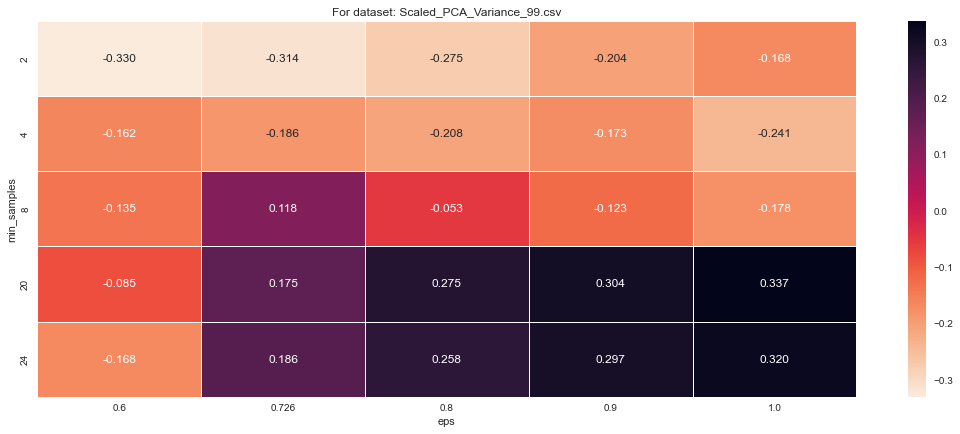

In [14]:
for dataset in datasets:
    data_df = pd.read_csv(dataset)
    data_np = data_df.to_numpy()

    for eps in dbscan_hyp["eps"]:
        for min_sample in dbscan_hyp["min_samples"]:
            dbscan = DBSCAN(eps=eps, min_samples=min_sample)
            dbscan.fit(data_np)
            cluster_labels = dbscan.labels_
            # print("cluster labels are: ", cluster_labels)

            n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
            if n_clusters_ <= 1:
                continue
            
            silhouette_avg = calculate_silhouette_score(data_np, cluster_labels)
            
            score_dict["eps"].append(eps)
            score_dict["min_samples"].append(min_sample)
            score_dict["score"].append(silhouette_avg)
   
    if score_dict["eps"]:
        result = pd.DataFrame(score_dict, columns=["eps", "min_samples", "score"])
        pivot_km = pd.pivot_table(result, index="min_samples", columns="eps", values="score")

        ## Plot table
        plt.figure(figsize=(15,6))
        sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
        plt.tight_layout()
        plt.title('For dataset: ' + dataset)


plt.show()

We will be fitting our final model on the the `Scaled_PCA_n3.csv` dataset. with the parameters: `eps` = 1.0, `min_samples` = 24

In [15]:
df_pca_3 = pd.read_csv("Scaled_PCA_n3.csv")

db = DBSCAN(eps=1.0, min_samples=20)
db.fit(df_pca_3.to_numpy())

clusters = db.labels_

n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)
print('Number of points per cluster:')
for i in range(n_clusters_):
    print('Cluster', i, ':', len(clusters[clusters==i]))
    

Number of clusters: 2
Number of noise points: 203
Number of points per cluster:
Cluster 0 : 1573
Cluster 1 : 436


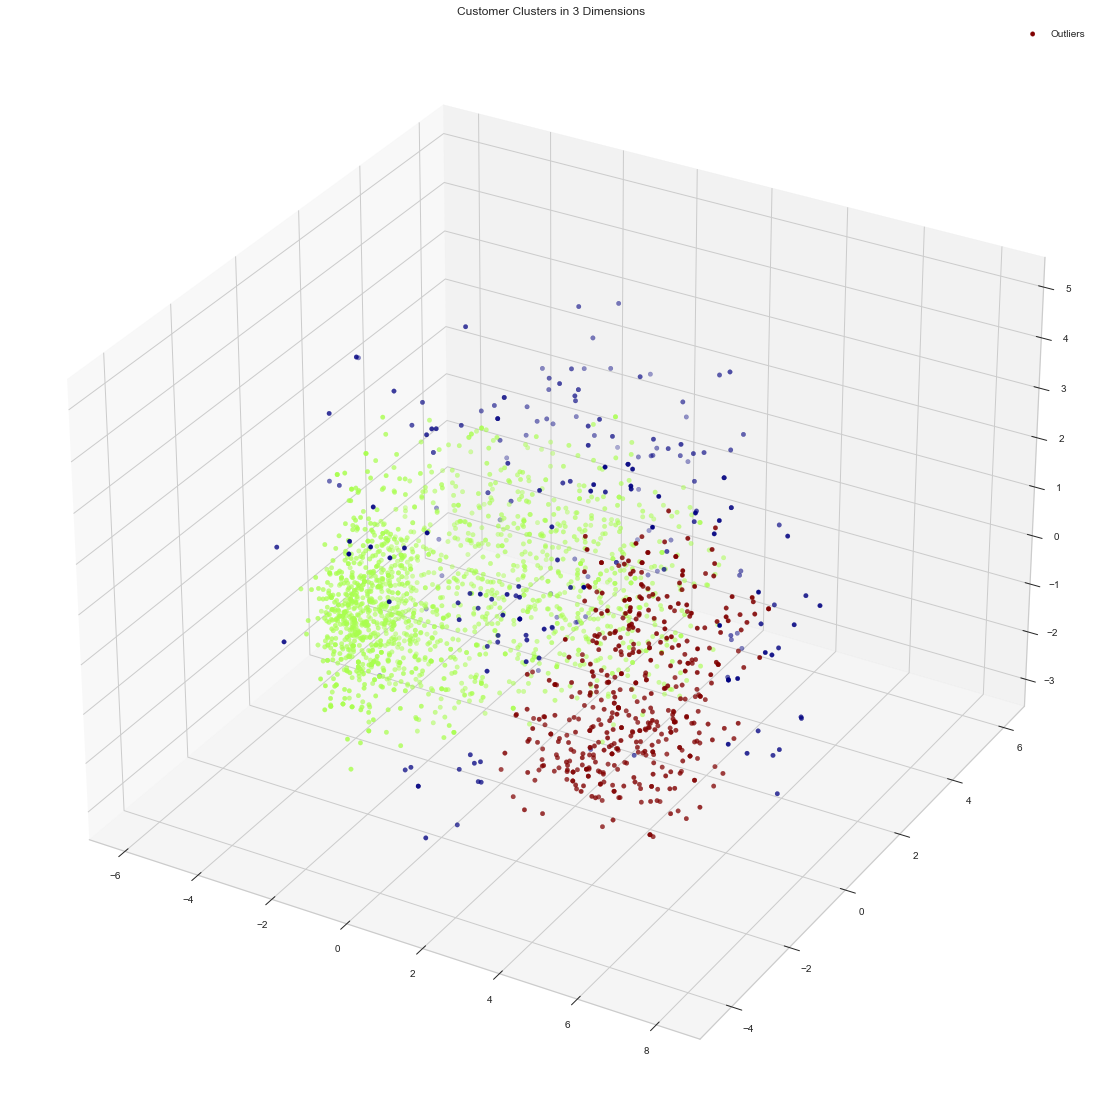

In [16]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df_pca_3["PC1"], df_pca_3["PC2"], df_pca_3["PC3"], 
           c=clusters, cmap=cm.get_cmap("jet", 10))
ax.set_title("Customer Clusters in 3 Dimensions")
ax.legend(['Outliers'])
plt.show()

# Future Works

There are still many more experiments we can run on this dataset. We can keep tuning the hyperparameters for the DBSCAN model to find better results or go back to data cleaning and preprocessing. Our Next future works include: 
- Analyze the clusters and the data points assigned to each cluster.
- Find the common patterns in the data points assigned to each cluster. 
- Find what they like or the kind of purchases they make according to clusters.
- Suggest what kind of products they might like to purchase.
- This Dataset can also be used as a classification problem to predict which customers will respond to marketing campaigns.


A reference for future works: [Kaggle Notebook](https://www.kaggle.com/code/calebreigada/clustering-dbscan-customer-response-prediction)